In [1]:
import pandas as pd

df = pd.read_csv('PLT_Department_Schedule.csv')
df

,Employee,Department Name,week1_Monday,week1_Tuesday,week1_Wednesday,week1_Thursday,week1_Friday,week2_Monday,week2_Tuesday,week2_Wednesday,...,week49_Monday,week49_Tuesday,week49_Wednesday,week49_Thursday,week49_Friday,week50_Monday,week50_Tuesday,week50_Wednesday,week50_Thursday,week50_Friday
0,emp1,PTL,1,0,0,1,0,1,1,0,...,0,0,1,1,0,1,0,1,0,0
1,emp2,PTL,0,0,0,0,0,1,0,1,...,1,1,1,1,1,0,0,1,0,1
2,emp3,PTL,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,emp4,PTL,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,emp5,PTL,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,emp994,DWA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
994,emp995,DWA,0,0,1,1,0,0,0,0,...,1,1,1,1,1,1,1,0,1,0
995,emp996,DWA,0,1,0,0,1,0,0,0,...,0,1,1,1,0,0,0,0,0,0
996,emp997,DWA,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,1,0


In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns
skewness = numeric_columns.skew()
skewness

week1_Monday        0.692265
week1_Tuesday       0.814672
week1_Wednesday     0.701795
week1_Thursday      0.725807
week1_Friday        0.740348
                      ...   
week50_Monday       0.804598
week50_Tuesday      0.799581
week50_Wednesday    0.814672
week50_Thursday     0.819729
week50_Friday       0.886743
Length: 250, dtype: float64

     Mondays  Tuesdays  Wednesdays  Thursdays  Fridays Department Name
0         21        13          20         15       16             PTL
1         19        15          21         15       10             PTL
2         14        17          15         17       13             PTL
3         15        14          15         13       15             PTL
4         14        22          17         13       15             PTL
..       ...       ...         ...        ...      ...             ...
993       18        15          14         18       16             DWA
994       19        13          17         14       16             DWA
995       17        14          15         10       18             DWA
996       12        16          20         19       17             DWA
997       17        19          16         18       16             DWA

[998 rows x 6 columns]


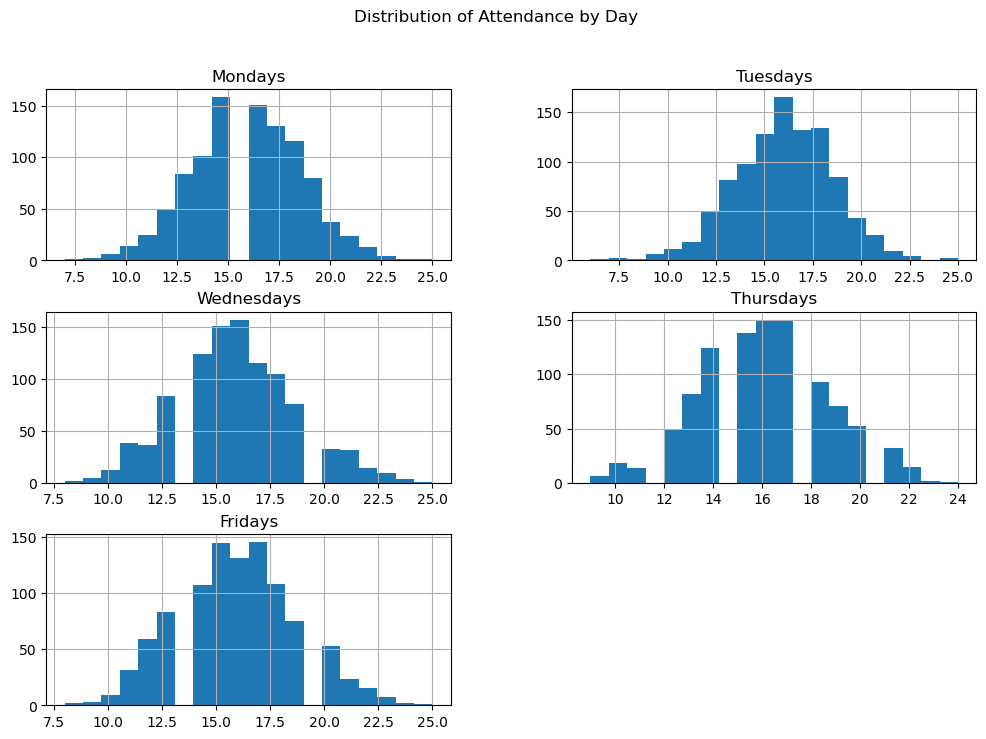

15873

In [5]:

consolidated_df = pd.DataFrame(index=df.index, columns=['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays'])
#consolidated_df['Department Name'] = df['Department Name']

# Calculate the count of office visits for each weekday
consolidated_df['Mondays'] = df.filter(like='Monday').sum(axis=1)
consolidated_df['Tuesdays'] = df.filter(like='Tuesday').sum(axis=1)
consolidated_df['Wednesdays'] = df.filter(like='Wednesday').sum(axis=1)
consolidated_df['Thursdays'] = df.filter(like='Thursday').sum(axis=1)
consolidated_df['Fridays'] = df.filter(like='Friday').sum(axis=1)
consolidated_df['Department Name'] = df['Department Name']

# Display the consolidated DataFrame
print(consolidated_df)
consolidated_df[['Mondays', 'Tuesdays', 'Wednesdays', 'Thursdays', 'Fridays']].hist(bins=20, figsize=(12, 8))
#df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Attendance by Day')
plt.show()

consolidated_df['Mondays'].sum()

In [15]:
# Assuming your data is in a DataFrame called df
department_agg = df.groupby('Department Name').sum()

# Drop the index (Employee Name) if still present
department_agg.reset_index(inplace=True)
department_agg.columns
# Now department_agg will have the summed attendance counts per department per day
department_agg=department_agg.drop('Employee', axis=1)
print(department_agg)

  Department Name  week1_Monday  week1_Tuesday  week1_Wednesday  \
0             DWA           149            139              161   
1             PTL           187            172              173   

   week1_Thursday  week1_Friday  week2_Monday  week2_Tuesday  week2_Wednesday  \
0             157           147           139            159              141   
1             172           179           176            164              172   

   week2_Thursday  ...  week49_Monday  week49_Tuesday  week49_Wednesday  \
0             140  ...            145             134               151   
1             172  ...            172             170               173   

   week49_Thursday  week49_Friday  week50_Monday  week50_Tuesday  \
0              155            139            131             139   
1              157            182            182             175   

   week50_Wednesday  week50_Thursday  week50_Friday  
0               141              145            139  
1              

In [62]:

df_columns = ['week-day',department_agg['Department Name'][0], department_agg['Department Name'][1]]
data = []
for col in department_agg.columns:
    if(col != 'Department Name'):
        temp_list = [col, department_agg[col][0], department_agg[col][1]]
        data.append(temp_list)

df = pd.DataFrame(data)
df.columns = ['week-day',department_agg['Department Name'][0], department_agg['Department Name'][1]]
print(df)
# import math
# print(max(df['DWA']))
# print(max(df['PTL']))

# transpose_dataset = department_agg.T
# df_transposed = department_agg.transpose()
# print(df_transposed[0])

             week-day  DWA  PTL
0        week1_Monday  149  187
1       week1_Tuesday  139  172
2     week1_Wednesday  161  173
3      week1_Thursday  157  172
4        week1_Friday  147  179
..                ...  ...  ...
245     week50_Monday  131  182
246    week50_Tuesday  139  175
247  week50_Wednesday  141  170
248   week50_Thursday  145  165
249     week50_Friday  139  158

[250 rows x 3 columns]


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [63]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

dept_a_data = df['PTL']

# Fit the ARIMA model
model = ARIMA(dept_a_data, order=(1, 1, 1))  # You can optimize the (p,d,q) parameters
model_fit = model.fit()

# Forecast future values (e.g., for the next 5 days)
forecast = model_fit.forecast(steps=5)

# Compare forecasted values with seat capacity
seats_allocated_dept_a = 201  # Given seat capacity
available_seats_prediction = forecast < seats_allocated_dept_a

print("Predicted seat availability for Dept_A:", available_seats_prediction)

Predicted seat availability for Dept_A: 250    True
251    True
252    True
253    True
254    True
Name: predicted_mean, dtype: bool


In [61]:
# seats_allocated = {'DWA': 100, 'PTL': 201}

# df['Dept_A_Seats_Left'] = seats_allocated['DWA'] - df['DWA']
# df['Dept_B_Seats_Left'] = seats_allocated['PTL'] - df['PTL']

# print(df['Dept_A_Seats_Left'])
# print(df['Dept_B_Seats_Left'])

# df['Dept_A_Available'] = df['Dept_A_Seats_Left'].apply(lambda x: 1 if x > 0 else 0)
# df['Dept_B_Available'] = df['Dept_B_Seats_Left'].apply(lambda x: 1 if x > 0 else 0)

# X = df[['week-day', 'DWA']]  # Add other relevant features
# y = df['Dept_A_Available']

# X = pd.get_dummies(X, columns=['week-day', 'DWA'])


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Make Predictions
# sample_day = X_test.iloc[0].values.reshape(1, -1)
# predictions = model.predict(sample_day)
# print(f'Predictions for sample day: {predictions}')

0     -49
1     -39
2     -61
3     -57
4     -47
       ..
245   -31
246   -39
247   -41
248   -45
249   -39
Name: Dept_A_Seats_Left, Length: 250, dtype: int64
0      14
1      29
2      28
3      29
4      22
       ..
245    19
246    26
247    31
248    36
249    43
Name: Dept_B_Seats_Left, Length: 250, dtype: int64
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.00
Predictions for sample day: [0]


c:\Users\shivv\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [71]:
print(df)

df['DWA'] = 197 - df['DWA']
df['PTL'] = 201 - df['PTL']

print(df)

test_d = department_agg.iloc[[0]]
monday = []
for col in department_agg.columns:
  if '_Monday' in col:
    monday.extend(department_agg[col])
print(monday)

             week-day  DWA  PTL
0        week1_Monday   48   14
1       week1_Tuesday   58   29
2     week1_Wednesday   36   28
3      week1_Thursday   40   29
4        week1_Friday   50   22
..                ...  ...  ...
245     week50_Monday   66   19
246    week50_Tuesday   58   26
247  week50_Wednesday   56   31
248   week50_Thursday   52   36
249     week50_Friday   58   43

[250 rows x 3 columns]
             week-day  DWA  PTL
0        week1_Monday  149  187
1       week1_Tuesday  139  172
2     week1_Wednesday  161  173
3      week1_Thursday  157  172
4        week1_Friday  147  179
..                ...  ...  ...
245     week50_Monday  131  182
246    week50_Tuesday  139  175
247  week50_Wednesday  141  170
248   week50_Thursday  145  165
249     week50_Friday  139  158

[250 rows x 3 columns]
[149, 187, 139, 176, 145, 167, 141, 169, 160, 164, 167, 184, 143, 169, 161, 167, 140, 177, 143, 175, 139, 177, 149, 183, 133, 174, 162, 163, 149, 194, 153, 168, 148, 177, 147, 169, 133

In [143]:
def find_list(dept):
  required_data = department_agg[department_agg['Department Name']== dept]
  res = {'_Monday': [], '_Tuesday':[],'_Wednesday':[],'_Thursday':[], '_Friday':[]}

  for col in required_data.columns:
    if '_' in col:
      a = col[col.find('_'): ]
      res[a].extend(required_data[col])
  
  print(len(res['_Friday']))
  return res



50
[187, 176, 167, 169, 164, 184, 169, 167, 177, 175, 177, 183, 174, 163, 194, 168, 177, 169, 152, 165, 166, 164, 172, 171, 171, 143, 186, 175, 149, 185, 185, 162, 163, 180, 151, 161, 151, 171, 150, 176, 162, 160, 175, 166, 187, 170, 155, 170, 172, 182]


In [144]:
# dwa_monday = [115, 122, 124, 111, 123, 128, 103, 115, 127, 113, 129, 126, 109, 119, 102, 111, 125, 127, 132, 120, 114, 120, 106, 117, 120, 115, 115, 124, 116, 124, 118, 129, 120, 122, 127, 124, 123, 128, 122, 111, 123, 112, 116, 113, 121, 118, 122, 133, 119, 119]
dept_day_list = find_list('PTL')['_Monday']
print(dept_day_list)
print(max(dept_day_list))
dept_day_list = [x if x<201 else 0 for x in dept_day_list]
dept_day_list_available = [201-x if x > 0 else 0 for x in dept_day_list]
print(dept_day_list_available)


50
[187, 176, 167, 169, 164, 184, 169, 167, 177, 175, 177, 183, 174, 163, 194, 168, 177, 169, 152, 165, 166, 164, 172, 171, 171, 143, 186, 175, 149, 185, 185, 162, 163, 180, 151, 161, 151, 171, 150, 176, 162, 160, 175, 166, 187, 170, 155, 170, 172, 182]
194
[14, 25, 34, 32, 37, 17, 32, 34, 24, 26, 24, 18, 27, 38, 7, 33, 24, 32, 49, 36, 35, 37, 29, 30, 30, 58, 15, 26, 52, 16, 16, 39, 38, 21, 50, 40, 50, 30, 51, 25, 39, 41, 26, 35, 14, 31, 46, 31, 29, 19]


In [145]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

train, test = dept_day_list_available[:45], dept_day_list_available[45:]

# Fit ARIMA model
model = ARIMA(train, order=(3,1,1))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))
actual_values = np.array(test)
print(actual_values)
print(predictions)

print("Predicted seat availability for Dept_A:", predictions)

# Calculate accuracy metrics
# mse = mean_squared_error(actual_values, predictions)
# rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predictions)
# mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Accuracy: {100-mae}')
# print(f'Mean Absolute Percentage Error: {mape}%')

[31 46 31 29 19]
[32.94517399 31.95930936 26.75492611 33.05035892 31.62792715]
Predicted seat availability for Dept_A: [32.94517399 31.95930936 26.75492611 33.05035892 31.62792715]
Mean Absolute Error: 7.3818449180312005
Accuracy: 92.6181550819688


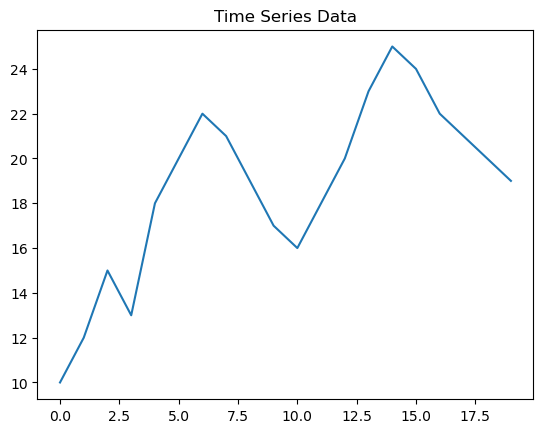

ADF Statistic: -4.960911371472909
p-value: 2.6505306057056734e-05


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 9.

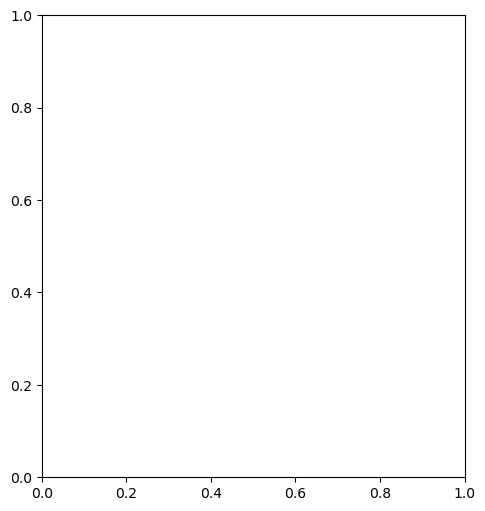

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

# Sample data (replace with your actual data)
data = [10, 12, 15, 13, 18, 20, 22, 21, 19, 17, 16, 18, 20, 23, 25, 24, 22, 21, 20, 19]
series = pd.Series(data)

# Step 1: Visualize the data
plt.plot(series)
plt.title('Time Series Data')
plt.show()

# Step 2: Make the series stationary
differenced = series.diff().dropna()

# Step 3: ADF test for stationarity
result = adfuller(differenced)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Step 4: Identify the order of the AR term (p)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(pacf(differenced, nlags=20))
plt.title('PACF Plot')

# Step 5: Identify the order of the MA term (q)
plt.subplot(122)
plt.plot(acf(differenced, nlags=20))
plt.title('ACF Plot')
plt.show()

# Step 6: Fit ARIMA model
model = ARIMA(series, order=(2, 1, 1))  # Replace with identified p, d, q values
model_fit = model.fit()
print(model_fit.summary())
